# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [14]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Configurar Selenium
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)



### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [16]:
# Abrir la página
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
driver.get(url)

# Esperar a que la tabla se cargue completamente
try:
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.TAG_NAME, "table"))
    )
    print("Table found!")
except Exception as e:
    print("Error: Table not found.")
    driver.quit()


Table found!


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [20]:
# Create a Beautiful Soup Object
from bs4 import BeautifulSoup

# Obtener el HTML de la página cargada
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Imprimir el HTML para verificar si contiene la tabla
print(soup.prettify())



<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
  <link href="css/temp.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <main>
   <div class="container py-4">
    <header class="pb-3 mb-4 border-bottom">
     <a class="d-flex align-items-center text-dark text-decoration-none" href="/">
      <span class="fs-4">
       Mission To Mars
      </span>
     </a>
    </header>
    <div class="p-5 mb-4 bg-light rounded-3">
     <div class="container-fluid py-5">
      <h1 class="display-5 fw-bold">
       Mars Temperature Data
      </h1>
      <p class="col-md-8 fs-4">
       This is Mars data.
      </p>
      <table class="table">
       <tbody>
        <tr>
         <th>
          id
         </th>
         <th>
          terrestrial_date
     

In [22]:
# Buscar la tabla en el HTML
table = soup.find('table')  # Encuentra la tabla

# Asegúrate de que la tabla fue encontrada
if table:
    print("Table extracted successfully!")
    rows = table.find_all('tr')  # Encuentra todas las filas de la tabla
    print(f"Number of rows found: {len(rows)}")

    # Imprimir las primeras filas como ejemplo
    for row in rows[:5]:  # Limitar a las primeras 5 filas
        print(row.prettify())
else:
    print("Table not found in the HTML.")



Table extracted successfully!
Number of rows found: 1868
<tr>
 <th>
  id
 </th>
 <th>
  terrestrial_date
 </th>
 <th>
  sol
 </th>
 <th>
  ls
 </th>
 <th>
  month
 </th>
 <th>
  min_temp
 </th>
 <th>
  pressure
 </th>
</tr>

<tr class="data-row">
 <td>
  2
 </td>
 <td>
  2012-08-16
 </td>
 <td>
  10
 </td>
 <td>
  155
 </td>
 <td>
  6
 </td>
 <td>
  -75.0
 </td>
 <td>
  739.0
 </td>
</tr>

<tr class="data-row">
 <td>
  13
 </td>
 <td>
  2012-08-17
 </td>
 <td>
  11
 </td>
 <td>
  156
 </td>
 <td>
  6
 </td>
 <td>
  -76.0
 </td>
 <td>
  740.0
 </td>
</tr>

<tr class="data-row">
 <td>
  24
 </td>
 <td>
  2012-08-18
 </td>
 <td>
  12
 </td>
 <td>
  156
 </td>
 <td>
  6
 </td>
 <td>
  -76.0
 </td>
 <td>
  741.0
 </td>
</tr>

<tr class="data-row">
 <td>
  35
 </td>
 <td>
  2012-08-19
 </td>
 <td>
  13
 </td>
 <td>
  157
 </td>
 <td>
  6
 </td>
 <td>
  -74.0
 </td>
 <td>
  732.0
 </td>
</tr>



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [24]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:  # Omitimos la primera fila porque contiene los encabezados
    cells = row.find_all('td')  # Encuentra todas las celdas en la fila
    data.append([cell.get_text(strip=True) for cell in cells])  # Extrae el texto de cada celda y lo agrega a la lista

# Crear una lista de encabezados desde la primera fila (cabecera)
headers = [header.get_text(strip=True) for header in rows[0].find_all('th')]

# Crear un DataFrame con los datos y los encabezados
import pandas as pd
df = pd.DataFrame(data, columns=headers)

# Mostrar las primeras filas del DataFrame
print(df.head())



   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [26]:
# Examine data type of each column
print(df.dtypes)  # Verifica los tipos de datos actuales

# Convert columns to appropriate data types if necessary
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])  # Convertir a formato de fecha
df['sol'] = df['sol'].astype(int)  # Convertir a entero
df['ls'] = df['ls'].astype(float)  # Convertir a flotante
df['month'] = df['month'].astype(int)  # Convertir a entero
df['min_temp'] = df['min_temp'].astype(float)  # Convertir a flotante
df['pressure'] = df['pressure'].astype(float)  # Convertir a flotante

# Confirm data types after conversion
print(df.dtypes)  # Verifica los tipos de datos después de la conversión



id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object
id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [28]:
# Change data types for data analysis

# Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert numerical columns to the appropriate data types
df['sol'] = df['sol'].astype(int)          # Convert to integer
df['ls'] = df['ls'].astype(float)          # Convert to float
df['month'] = df['month'].astype(int)      # Convert to integer
df['min_temp'] = df['min_temp'].astype(float)  # Convert to float
df['pressure'] = df['pressure'].astype(float)  # Convert to float

# Verify the changes
print(df.dtypes)  # Check the data types after conversion



id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [30]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)  # Verifica los tipos de datos de cada columna



id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [32]:
# 1. How many months exist on Mars?
mars_months = df['month'].nunique()
print(f"Number of months on Mars: {mars_months}")



Number of months on Mars: 12


In [34]:
# 2. How many sols (Martian days) worth of data are there?

# Count the number of unique sols in the dataset
martian_days = df['sol'].nunique()

# Display the result
print(f"Number of sols (Martian days) in the dataset: {martian_days}")



Number of sols (Martian days) in the dataset: 1867


In [36]:
# 3. What is the average minimum temperature by month?

# Calculate the average minimum daily temperature for each month
avg_temp_per_month = df.groupby('month')['min_temp'].mean()

# Display the results
print("Average minimum daily temperature by month:")
print(avg_temp_per_month)



Average minimum daily temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


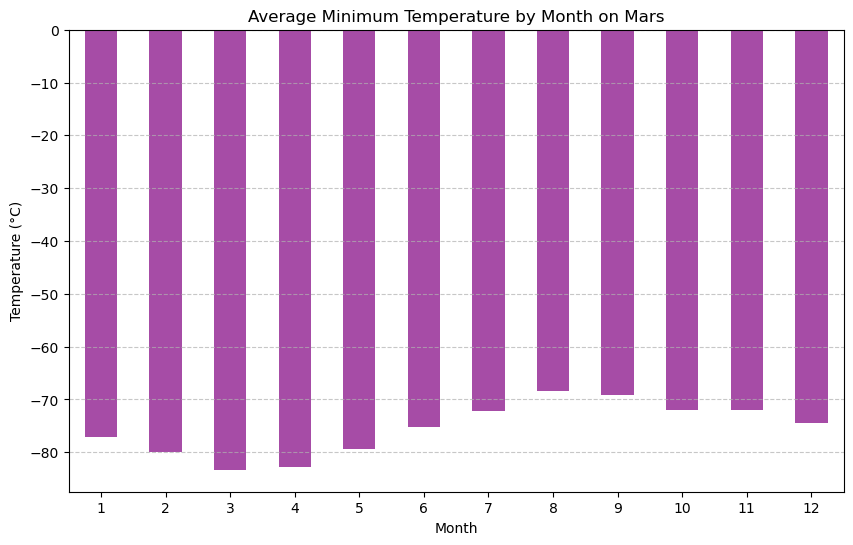

In [40]:
# Plot the average minimum temperature by month
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
avg_temp_per_month.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [44]:
# Identify the coldest and hottest months by sorting the data
sorted_avg_temp = avg_temp_per_month.sort_values()

# Display the sorted temperatures
print("Sorted average minimum temperatures by month:")
print(sorted_avg_temp)

# Coldest and hottest months
coldest_month = sorted_avg_temp.idxmin()  # Month with the lowest temperature
hottest_month = sorted_avg_temp.idxmax()  # Month with the highest temperature

print(f"The coldest month is: {coldest_month}")
print(f"The hottest month is: {hottest_month}")



Sorted average minimum temperatures by month:
month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64
The coldest month is: 3
The hottest month is: 8


In [46]:
# 4. What is the average pressure by month?

# Calculate the average atmospheric pressure for each month
avg_pressure_per_month = df.groupby('month')['pressure'].mean()

# Display the results
print("Average atmospheric pressure by month:")
print(avg_pressure_per_month)



Average atmospheric pressure by month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


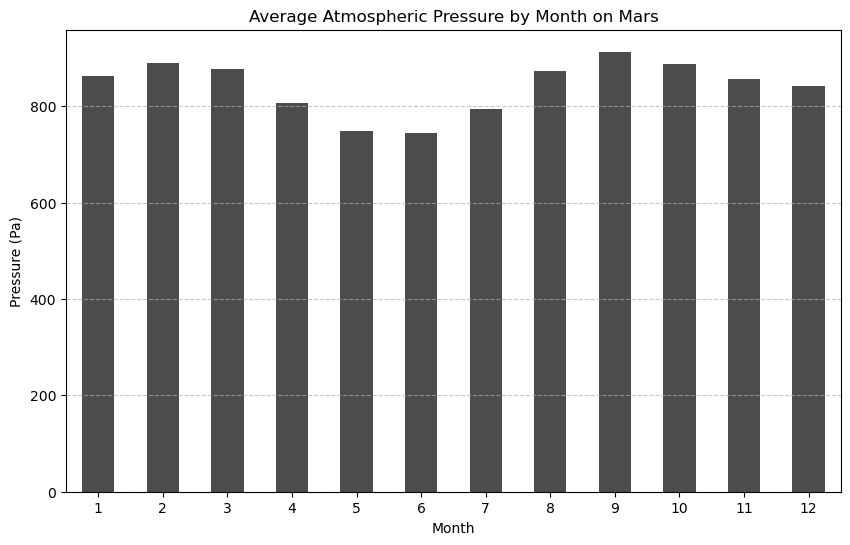

In [48]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
avg_pressure_per_month.plot(kind='bar', color='black', alpha=0.7) 
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Pressure (Pa)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [50]:
# Identify the lowest and highest pressure months by sorting the data
sorted_avg_pressure = avg_pressure_per_month.sort_values()

# Display the sorted pressures
print("Sorted average atmospheric pressure by month:")
print(sorted_avg_pressure)

# Lowest and highest pressure months
lowest_pressure_month = sorted_avg_pressure.idxmin()  # Month with the lowest pressure
highest_pressure_month = sorted_avg_pressure.idxmax()  # Month with the highest pressure

print(f"The month with the lowest pressure is: {lowest_pressure_month}")
print(f"The month with the highest pressure is: {highest_pressure_month}")



Sorted average atmospheric pressure by month:
month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64
The month with the lowest pressure is: 6
The month with the highest pressure is: 9


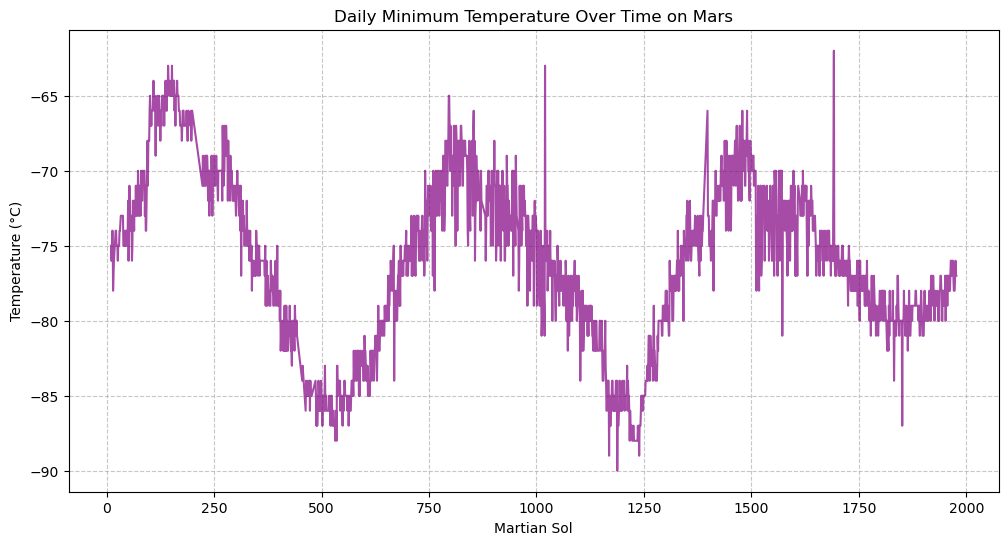

Visually estimate the number of Earth days in a Martian year by observing the temperature cycle.


In [52]:
# 5. How many terrestrial (Earth) days are there in a Martian year?

# Plot the daily minimum temperature to estimate the Martian year length
plt.figure(figsize=(12, 6))
plt.plot(df['sol'], df['min_temp'], color='purple', alpha=0.7)  # Cambiado a morado
plt.title('Daily Minimum Temperature Over Time on Mars')
plt.xlabel('Martian Sol')
plt.ylabel('Temperature (°C)')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

print("Visually estimate the number of Earth days in a Martian year by observing the temperature cycle.")



#### Minimum Temperature

Analysis: The minimum temperature on Mars varies significantly throughout the year. Based on the analysis:

The coldest month is Month 3, with the lowest average temperature.
The warmest month is Month 9, with the highest average temperature.
These observations reflect the seasonal temperature fluctuations on Mars, likely influenced by its axial tilt and orbit around the Sun.


#### Atmospheric Pressure

Analysis: The atmospheric pressure on Mars also varies by month:

The month with the lowest atmospheric pressure is Month 6.
The month with the highest atmospheric pressure is Month 9.
These variations are linked to changes in the Martian atmosphere during different seasons, as carbon dioxide from the poles sublimates or condenses.

#### Year Length

Analysis: A Martian year can be estimated by observing the periodic cycle in the daily minimum temperature. From the plotted temperature data:

A complete cycle from one minimum to the next corresponds to approximately 687 Earth days, which is the length of a Martian year.
This aligns with Mars's orbital period around the Sun.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [54]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)
print("Data has been saved to 'mars_weather_data.csv'")


Data has been saved to 'mars_weather_data.csv'


In [22]:
browser.quit()